<a href="https://colab.research.google.com/github/AislingGilder85/Project-2/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2 - Part 2
 - Aisling Gilder
 - 06/15/2022

In [1]:
#imports and libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load white wine data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS83MAgVaiUDy_7Tv-WW1Kj1zy59DM-ALhkAJY_K70IGBKmPp9-4cFtWO_h1M82cQ/pub?output=xlsx'
df = pd.read_excel(url)
print(df.shape)
df.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


##Data Cleaning

In [3]:
#verify the dtypes of the data set and see if there are any columns that are not needed. All columns will be kept
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [4]:
#the quality column should be integer, not float.
df['quality'] = df['quality'].astype(int)
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
#check for duplicates
df.duplicated().sum()

937

In [6]:
#remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
#check for missing data
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#look at the value ranges of our dataframe
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


>We can see that 'residual sugar', 'free sulfur dioxide', and 'total sulfer dioxide' all have some high outliers. Per the TTB of the US Department of the Treasurey(TTB.gov), the total free SO2 must be under 350 mg/L.
We will be using a standar deviations method to remove the outlying rows

In [9]:
#5 standard deviations has been chosen to remove the outliers while keeping as much data under the 350mg/L total SO2 limit
std_devs = 5
df_noliers = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < std_devs)
   .all(axis=1)]
print(df_noliers.shape)
df_noliers.describe()

(3887, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3887.00000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000
mean,6.83158,0.278353,0.331562,5.888976,0.044099,34.602264,136.500257,0.993751,3.196823,0.490178,10.601491,5.867764
std,0.85379,0.098623,0.115672,4.741339,0.015564,16.243983,42.356749,0.002801,0.151540,0.113124,1.217687,0.885061
min,3.80000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.30000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991600,3.100000,0.410000,9.500000,5.000000
50%,6.80000,0.260000,0.320000,4.700000,0.042000,33.000000,132.000000,0.993420,3.190000,0.480000,10.500000,6.000000
75%,7.30000,0.320000,0.380000,8.850000,0.050000,45.000000,166.000000,0.995700,3.290000,0.550000,11.400000,6.000000
max,10.70000,0.785000,0.910000,26.050000,0.160000,118.500000,344.000000,1.002950,3.820000,1.010000,14.200000,9.000000


> Bringing the 'total sulfur dioxide' columns max value under the legal limit has also removed the outliers from the 'residual sugar' and 'free sulfur dioxide' columns

##Exploratory Visual Analysis

Target Analysis

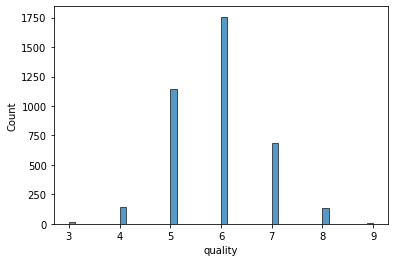

In [10]:
#histogram of quality
sns.histplot(df_noliers['quality']);

> Assuming a 10 point scale was used for quality rating, the majority of our wines are just slightly better than average at 6/10. Wines at 5/10 and 7/10 make up the second and third most common rating, respectivly.

Correlations between features in the data set

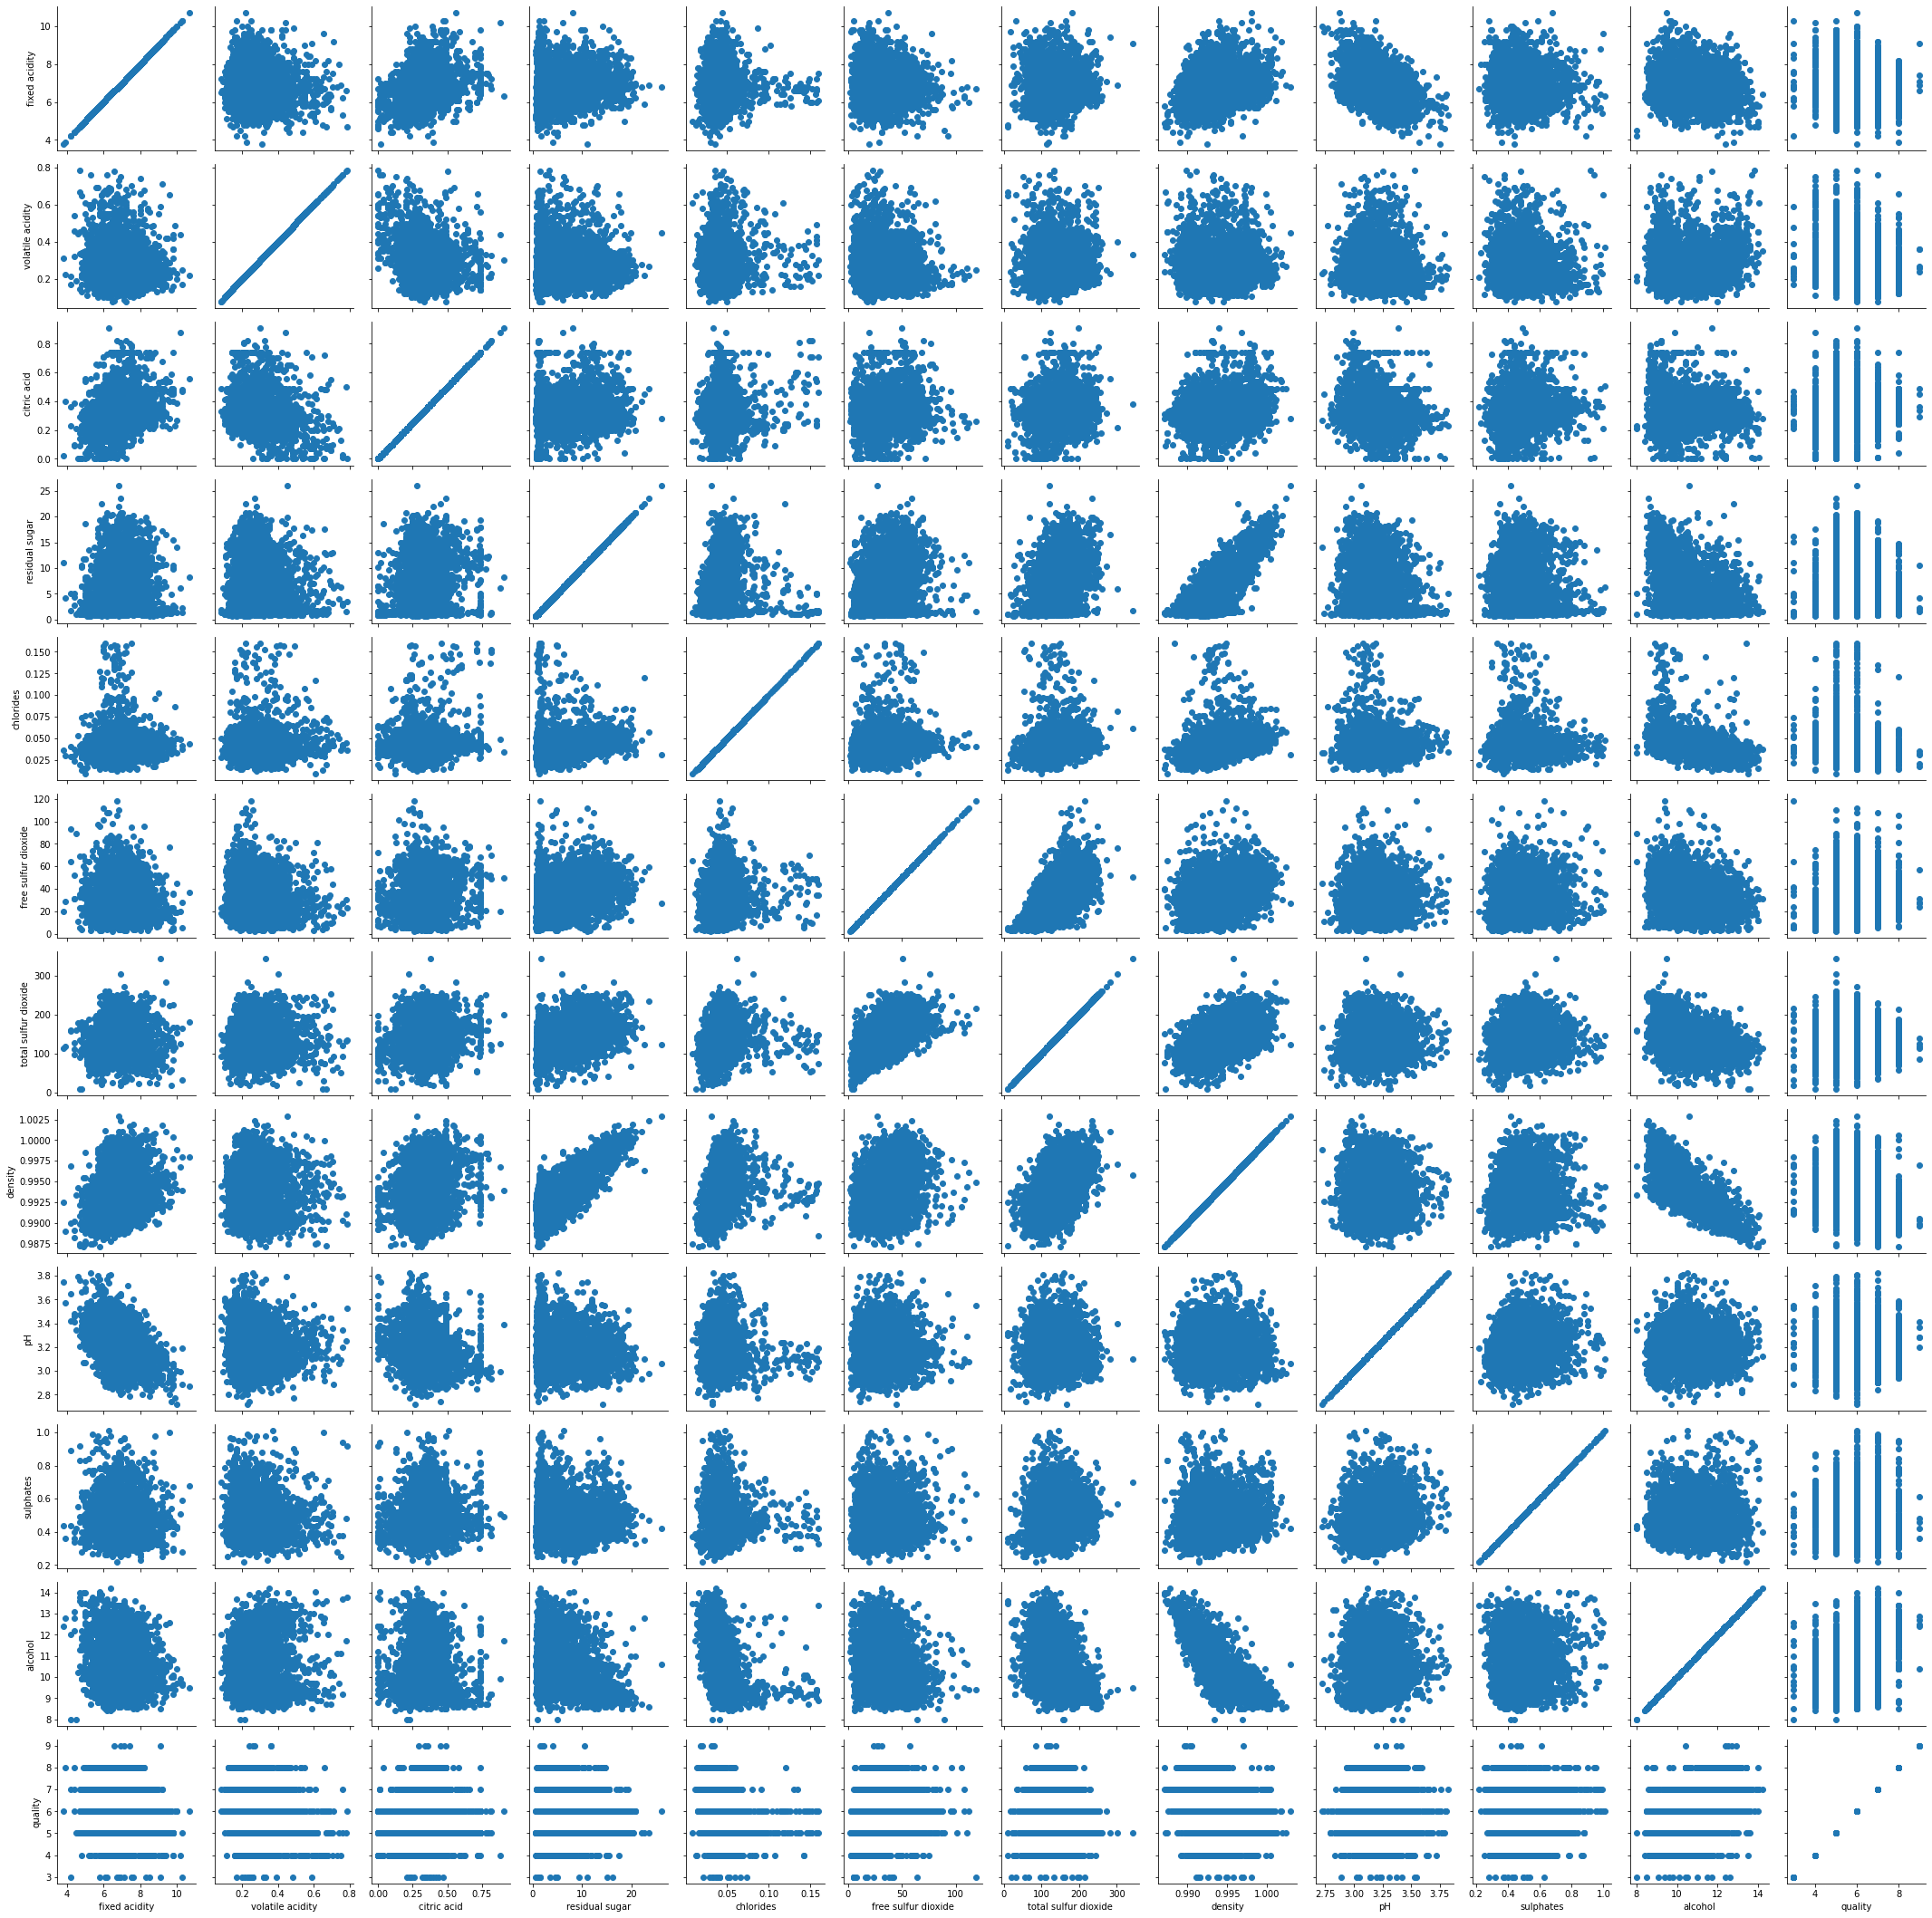

In [12]:
scatter = sns.PairGrid(df_noliers)
scatter.map(plt.scatter);

> Most of the corellations in our data set are very week. There are a few that were expected. The negative relationship between residual sugar and alcohol, as sugar is the fuel used the the yeast in the fermenting proggres. Also the negative relationship with alcohol and density, due to alcohol being less dense than water. Inversely, there is a positive realtionship between total sulfur dioxide and density. SO2 is more dense than H20. In fact, due to the chemical nature of our data set, most of the strong correlations are between density and x other column.

> The one relationship that suprised me a litle was the fairly strong correlations between residual sugar and both free and total sulfur dioxide. Some low level research has indicated that many sugar purification systems use a sulphitation process that introduces SO2 to the sugar at two different points. This data indicates that not all of the sulfur is removed before the sugar is shippped out and has made it into our selection of wines.

> I have included a heat map below as some of the scatter plots do not show the corellational trend well.

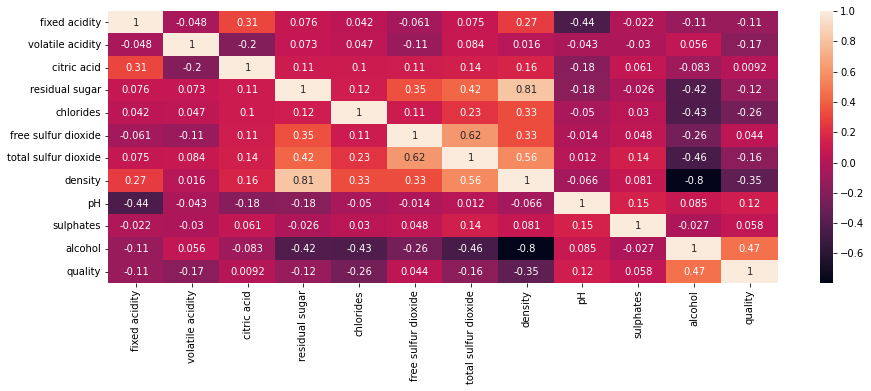

In [15]:
corr = df_noliers.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True);